## Descripcion del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Análisis exploratorio de datos

In [1]:
#Estas son las librerías a utilizar.
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [3]:
#Se importan los archivos csv
ds1 = pd.read_csv('moved_project_sql_result_01.csv')
ds2 = pd.read_csv('moved_project_sql_result_04.csv')
ds3 = pd.read_csv('moved_project_sql_result_07.csv')

In [4]:
ds1.info()
ds1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
ds2.info()
ds2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
ds3.info()
ds3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


En este caso, convertiremos la columna 'start_ts' a tipo datetime para facilitar su análisis. Las demás columnas presentan el tipo de datos requerido.

In [7]:
#Se convierte el tipo de datos de la columna 'start_ts' a datatime
ds3['start_ts'] = pd.to_datetime(ds3['start_ts'])
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


**Se ha verificado que no existen valores ausentes y que los tipos de datos cumplen con los requisitos necesarios para su análisis.**

In [8]:
# Nos aseguramos que no existan espacios en blanco al inicio de los nombres de las columnas.
ds1.columns = ds1.columns.str.strip()
ds2.columns = ds2.columns.str.strip()

In [9]:
#Se confirma que no existan filas duplicadas en nuestros datasets.
print (ds1.duplicated().sum())
print (ds2.duplicated().sum())

0
0


**Ahora podemos empezar a trabajar con los datos de las tablas anteriores**

In [10]:
#Se identifican los 10 principales barrios en términos de finalización
top_locations = ds2.nlargest(10, 'average_trips')
top_locations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:title={'center':'Una empresa se destaca como líder en el mercado de viajes, con una amplia ventaja competitiva.'}, xlabel='Compañía', ylabel='Número de viajes'>

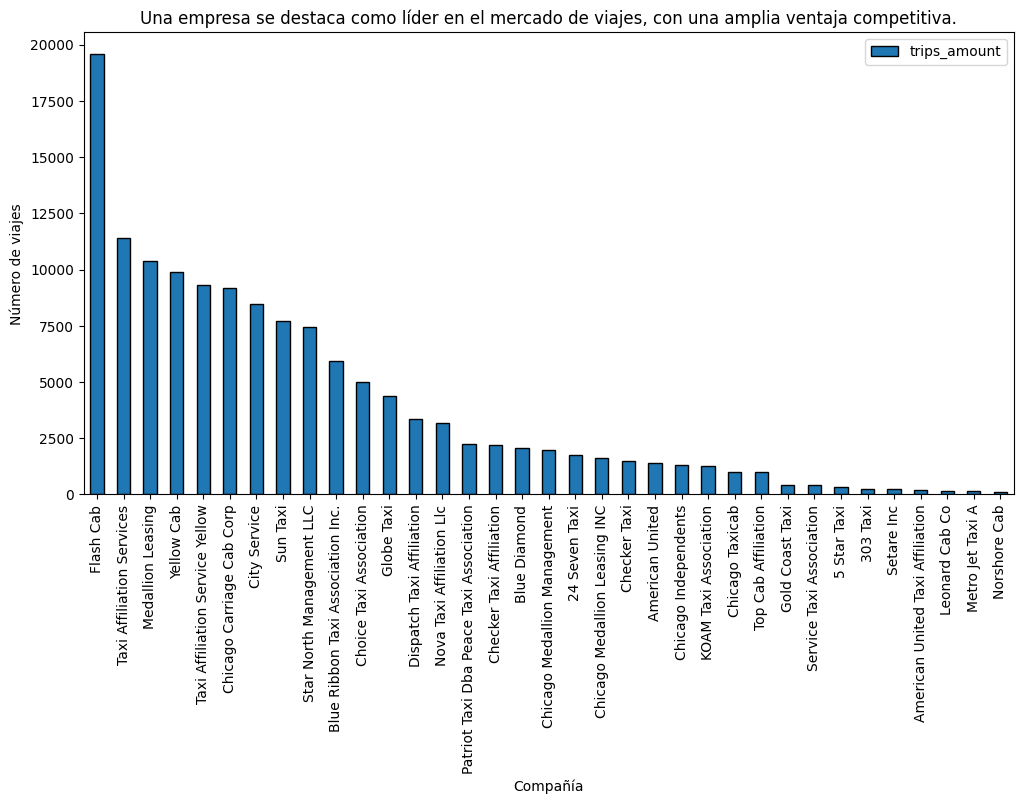

In [10]:
ds1_top = ds1[ds1['trips_amount']>100] #Se filtra el df para empresas que realizaron mas de 100 viajes

ds1_top.plot(kind='bar', x = 'company_name', title= 'Una empresa se destaca como líder en el mercado de viajes, con una amplia ventaja competitiva.', xlabel='Compañía', ylabel='Número de viajes', edgecolor= 'black', figsize= [12, 6])

**Se ha observado que Flash Cab se posiciona como la empresa líder en el sector de viajes, alcanzando casi el doble de viajes en comparación con el segundo lugar. Si bien en algunos rangos existen empresas que compiten entre sí de manera más equilibrada, se presentan caídas significativas en ciertos puntos para otros grupos de empresas de viajes.**

<Axes: title={'center': 'Se registra un elevado flujo de viajes en Chicago, aunque este varía entre los diferentes barrios'}, xlabel='Barrio', ylabel='Promedio de viajes finalizados'>

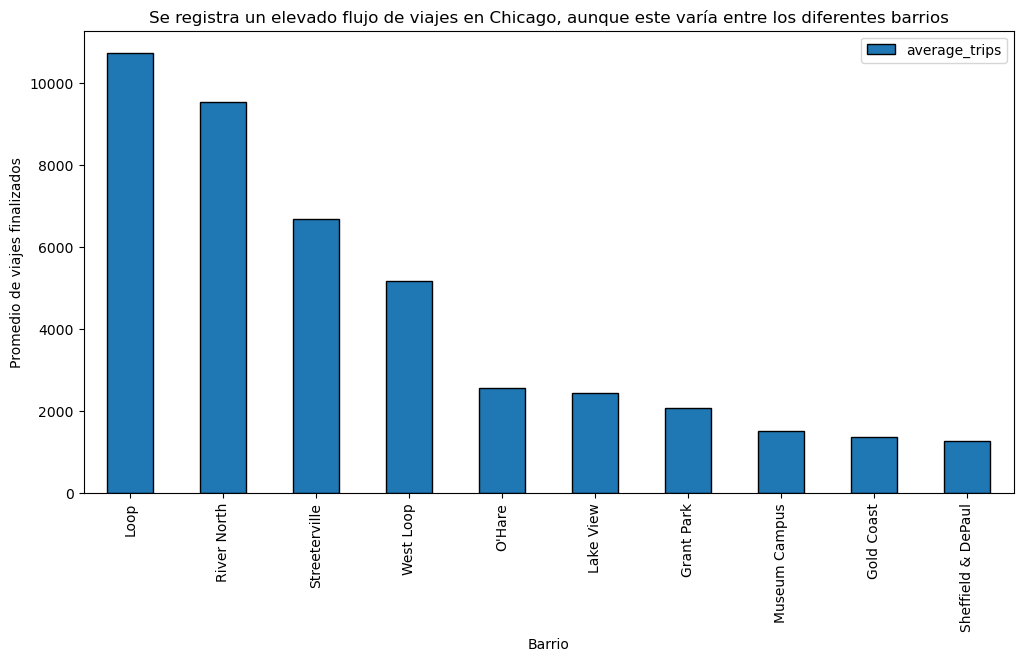

In [11]:
top_locations.plot(kind='bar', x = 'dropoff_location_name', title= 'Se registra un elevado flujo de viajes en Chicago, aunque este varía entre los diferentes barrios', xlabel='Barrio', ylabel='Promedio de viajes finalizados', edgecolor= 'black', figsize= [12, 6])

**Los barrios Loop y River North se posicionan como los destinos más visitados en Chicago, con un notable número de viajes registrados. Sin embargo, para comprender mejor las razones detrás de estas cifras, sería valioso realizar un análisis más profundo que explore las características específicas de estos barrios y su atractivo para los visitantes.**

## Prueba de hipótesis (Python)

In [12]:
#filtramos para tener las condiciones climaticas separadas por 'bad' y 'good'
rainy_saturdays = ds3[ds3['weather_conditions'] == 'Bad']
non_rainy_saturdays = ds3[ds3['weather_conditions'] == 'Good']

In [13]:
#A nuestras tablas resultantes del filtro anterior se extrae la duración de los viajes
rainy_duration = rainy_saturdays['duration_seconds']
non_rainy_duration = non_rainy_saturdays['duration_seconds']

- Hipótesis nula (H0): La duración promedio de los viajes en sábados lluviosos es igual a la duración promedio en sábados no lluviosos.

- Hipótesis alternativa (H1): La duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio en sábados no lluviosos.

In [14]:
# Prueba t de Student
t_stat, p_value = st.ttest_ind(rainy_duration, non_rainy_duration)

# Resultado
alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

T-statistic: 6.946177714041499, P-value: 6.517970327099473e-12
Rechazamos la hipótesis nula.


**La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía según las condiciones climáticas. En particular, se observa que los días lluviosos, presentan una duración promedio diferente en comparación con los días no lluviosos.**

## Conclusión general

**El análisis del sector de viajes en Chicago revela varios hallazgos importantes. Flash Cab se establece como la empresa líder, con casi el doble de viajes en comparación con su competidor más cercano. Además, los barrios Loop y River North se destacan como los destinos más visitados, lo que sugiere la necesidad de un análisis más profundo sobre las características que los hacen atractivos para los viajeros. Por último, se observa que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varía según las condiciones climáticas, destacándose diferencias significativas entre días lluviosos y no lluviosos. Estos hallazgos ofrecen una visión integral del panorama de viajes en Chicago y plantean oportunidades para futuras investigaciones y mejoras en el servicio.**